In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

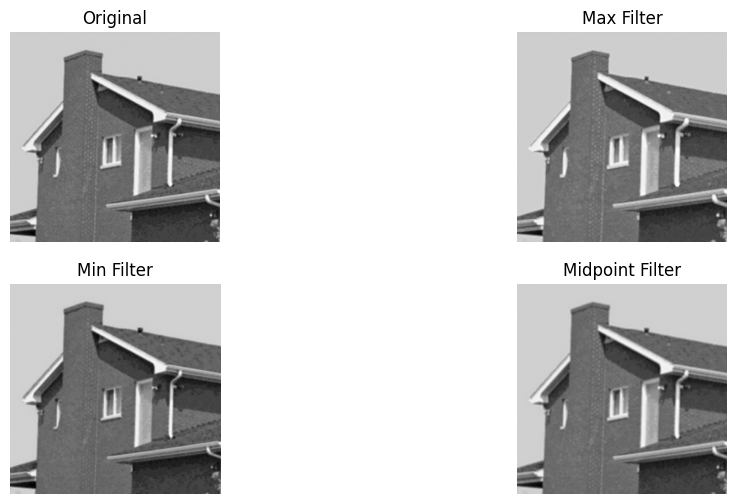

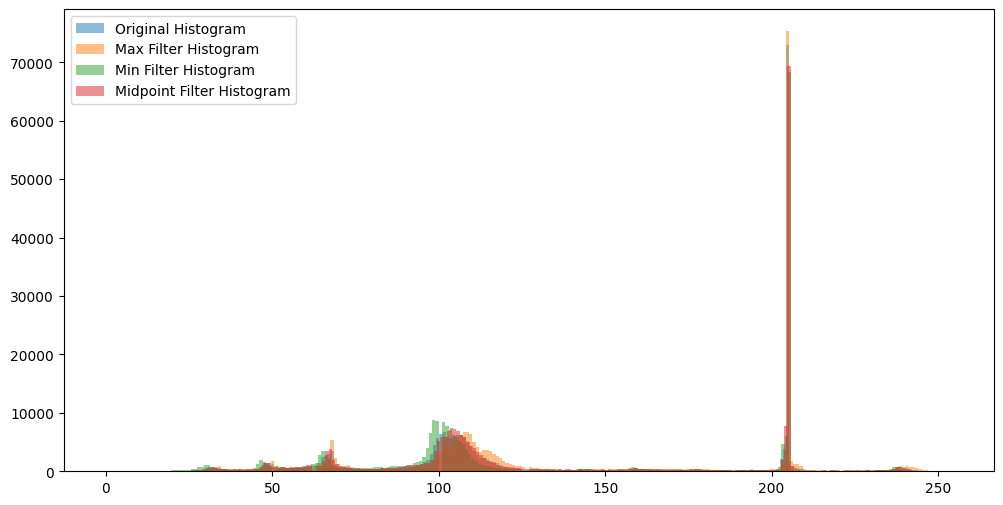

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('/content/Grey scale Image_1.png', cv2.IMREAD_GRAYSCALE)

# Apply Max Filter
max_filter = cv2.dilate(image, np.ones((3, 3), np.uint8))

# Apply Min Filter
min_filter = cv2.erode(image, np.ones((3, 3), np.uint8))

# Apply Midpoint Filter
midpoint_filter = ((max_filter.astype(np.int32) + min_filter.astype(np.int32)) // 2).astype(np.uint8)

# Display the results
filters = {"Original": image, "Max Filter": max_filter, "Min Filter": min_filter, "Midpoint Filter": midpoint_filter}
plt.figure(figsize=(12, 6))

for i, (title, filtered_image) in enumerate(filters.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()

# Compare histograms
plt.figure(figsize=(12, 6))
for title, filtered_image in filters.items():
    plt.hist(filtered_image.ravel(), bins=256, label=f'{title} Histogram', alpha=0.5)
plt.legend()
plt.show()


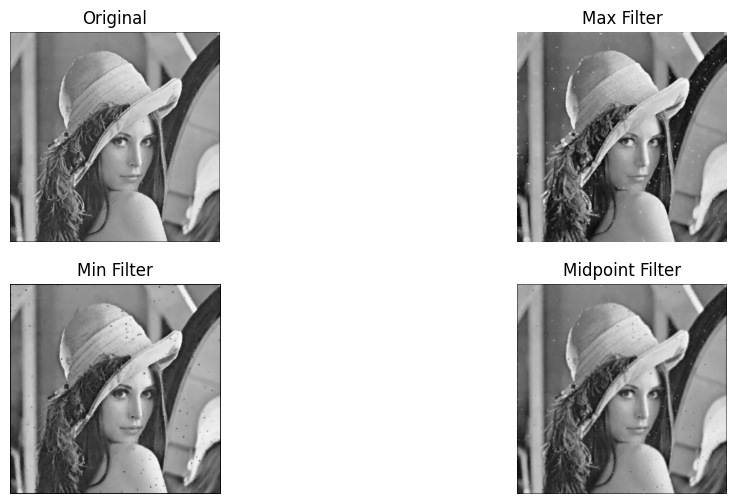

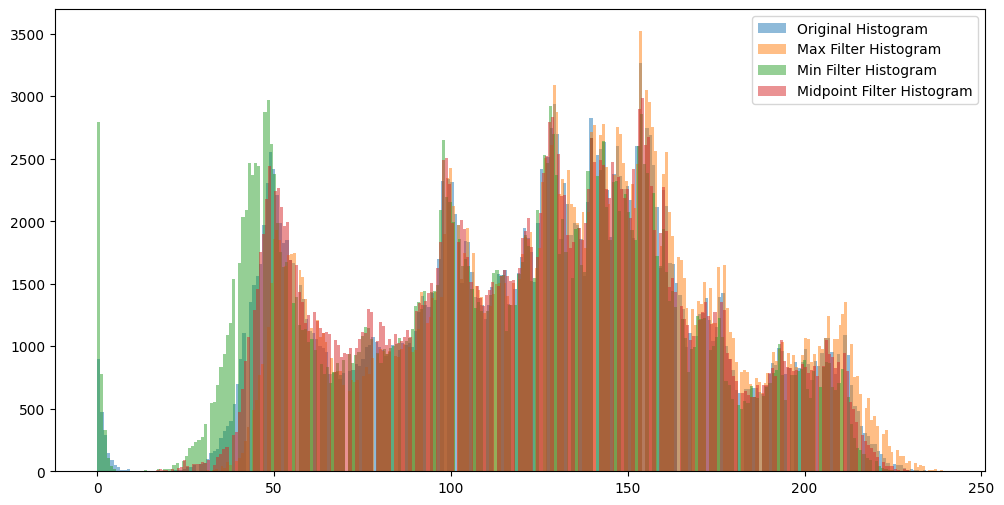

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('/content/Grey Scale Image_2.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Max Filter
max_filter = cv2.dilate(image, np.ones((3, 3), np.uint8))

# Apply Min Filter
min_filter = cv2.erode(image, np.ones((3, 3), np.uint8))

# Apply Midpoint Filter
midpoint_filter = ((max_filter.astype(np.int32) + min_filter.astype(np.int32)) // 2).astype(np.uint8)

# Display the results
filters = {"Original": image, "Max Filter": max_filter, "Min Filter": min_filter, "Midpoint Filter": midpoint_filter}
plt.figure(figsize=(12, 6))

for i, (title, filtered_image) in enumerate(filters.items()):
    plt.subplot(2, 2, i + 1)
    plt.imshow(filtered_image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.show()

# Compare histograms
plt.figure(figsize=(12, 6))
for title, filtered_image in filters.items():
    plt.hist(filtered_image.ravel(), bins=256, label=f'{title} Histogram', alpha=0.5)
plt.legend()
plt.show()


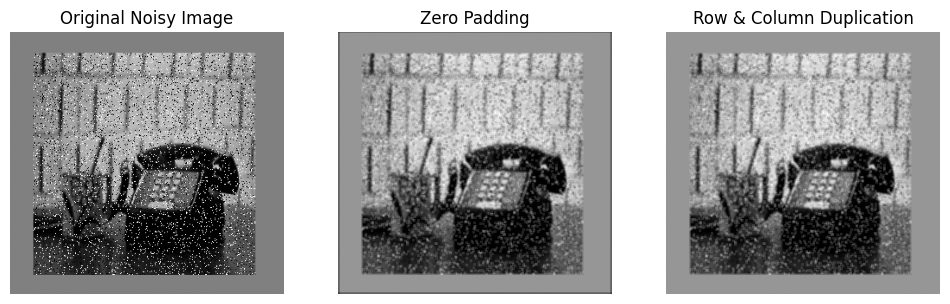

In [6]:
# Load noisy image
noisy_image = cv2.imread('/content/Noisy image_1.png', cv2.IMREAD_GRAYSCALE)

# Mean Filter using Zero Padding
zero_padded_image = cv2.copyMakeBorder(noisy_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
mean_filtered_zero = cv2.filter2D(zero_padded_image, -1, np.ones((3, 3)) / 9)

# Mean Filter using Row and Column Duplication Padding
dup_padded_image = cv2.copyMakeBorder(noisy_image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
mean_filtered_dup = cv2.filter2D(dup_padded_image, -1, np.ones((3, 3)) / 9)

# Display and analyze results
plt.figure(figsize=(12, 6))
titles = ['Original Noisy Image', 'Zero Padding', 'Row & Column Duplication']
images = [noisy_image, mean_filtered_zero, mean_filtered_dup]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


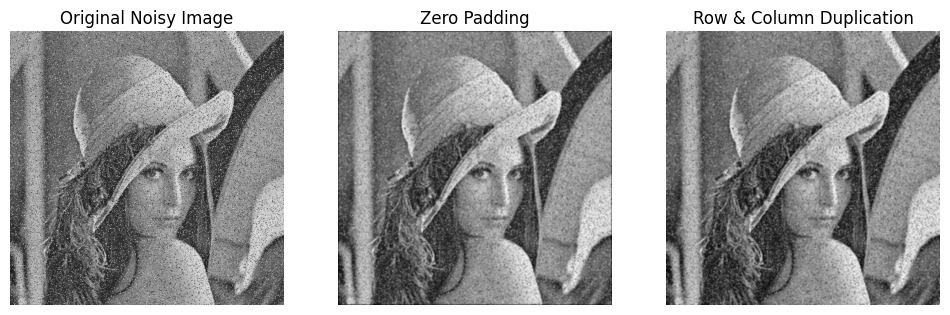

In [7]:
# Load noisy image
noisy_image = cv2.imread('/content/Noisy Image_2.webp', cv2.IMREAD_GRAYSCALE)

# Mean Filter using Zero Padding
zero_padded_image = cv2.copyMakeBorder(noisy_image, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
mean_filtered_zero = cv2.filter2D(zero_padded_image, -1, np.ones((3, 3)) / 9)

# Mean Filter using Row and Column Duplication Padding
dup_padded_image = cv2.copyMakeBorder(noisy_image, 1, 1, 1, 1, cv2.BORDER_REPLICATE)
mean_filtered_dup = cv2.filter2D(dup_padded_image, -1, np.ones((3, 3)) / 9)

# Display and analyze results
plt.figure(figsize=(12, 6))
titles = ['Original Noisy Image', 'Zero Padding', 'Row & Column Duplication']
images = [noisy_image, mean_filtered_zero, mean_filtered_dup]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


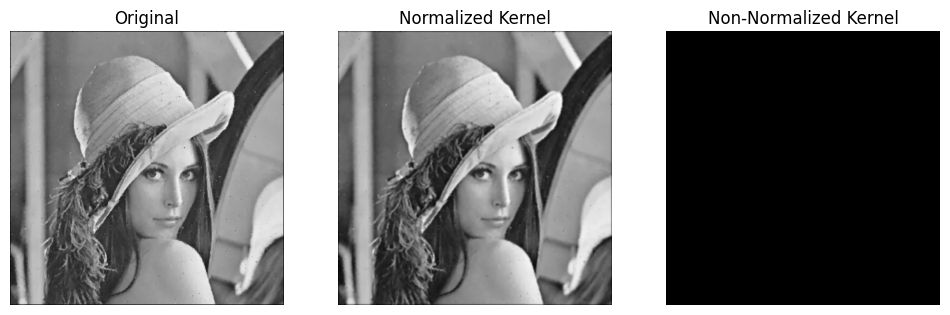

In [8]:
# Normalized kernel (sum of kernel elements equals 1)
normalized_kernel = np.ones((3, 3)) / 9

# Non-normalized kernel
non_normalized_kernel = np.ones((3, 3)) * 5

# Apply both kernels to the image
normalized_output = cv2.filter2D(image, -1, normalized_kernel)
non_normalized_output = cv2.filter2D(image, -1, non_normalized_kernel)

# Display and compare
plt.figure(figsize=(12, 6))
titles = ['Original', 'Normalized Kernel', 'Non-Normalized Kernel']
images = [image, normalized_output, non_normalized_output]

for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()


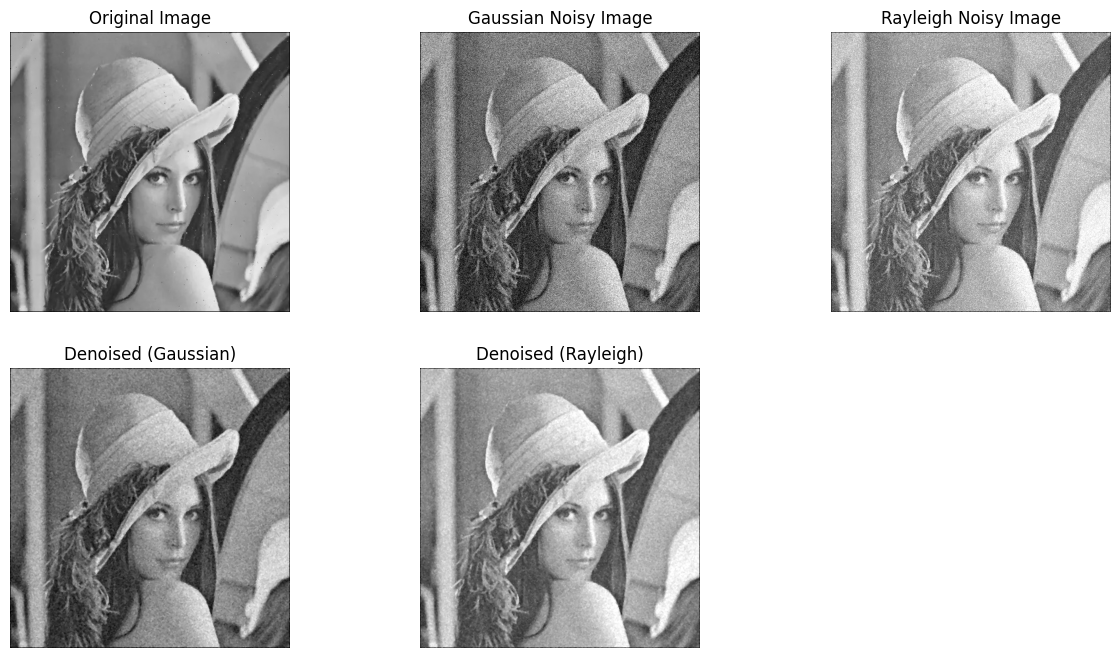

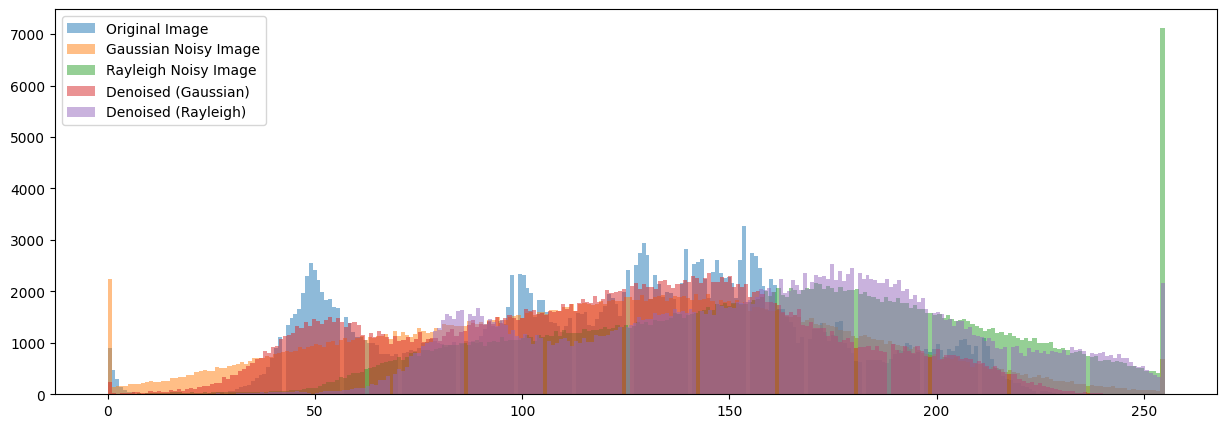

In [9]:
def add_gaussian_noise(img):
    mean = 0
    stddev = 25
    gaussian_noise = np.random.normal(mean, stddev, img.shape).astype(np.float32)
    noisy_image = cv2.add(img.astype(np.float32), gaussian_noise)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

def add_rayleigh_noise(img):
    rayleigh_noise = np.random.rayleigh(30, img.shape).astype(np.float32)
    noisy_image = cv2.add(img.astype(np.float32), rayleigh_noise)
    return np.clip(noisy_image, 0, 255).astype(np.uint8)

# Add Gaussian and Rayleigh noise
gaussian_noisy_image = add_gaussian_noise(image)
rayleigh_noisy_image = add_rayleigh_noise(image)

# Apply Median Filter
median_filtered_gaussian = cv2.medianBlur(gaussian_noisy_image, 3)
median_filtered_rayleigh = cv2.medianBlur(rayleigh_noisy_image, 3)

# Plot histograms and compare
plt.figure(figsize=(15, 8))

titles = [
    "Original Image", "Gaussian Noisy Image", "Rayleigh Noisy Image",
    "Denoised (Gaussian)", "Denoised (Rayleigh)"
]
images = [image, gaussian_noisy_image, rayleigh_noisy_image, median_filtered_gaussian, median_filtered_rayleigh]

for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.show()

# Plot histograms
plt.figure(figsize=(15, 5))
for i, img in enumerate(images):
    plt.hist(img.ravel(), bins=256, alpha=0.5, label=titles[i])
plt.legend()
plt.show()
